# Flower GAN
GAN for generating images of flowers

In [145]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [118]:
import matplotlib.pyplot as plt
from keras import layers
#import tensorflow.keras.backend as K
import time

Setup kaggle environment

In [76]:
from google.colab import drive

# Setup API token
drive.mount("/content/gdrive")
!mkdir ~/.kaggle
!cp gdrive/MyDrive/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Install kaggle
!pip install kaggle

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [77]:
# Download dataset
!kaggle datasets download -d l3llff/flowers

flowers.zip: Skipping, found more recently modified local copy (use --force to force download)


In [78]:
# Unzip dataset
!unzip flowers.zip

Archive:  flowers.zip
replace flowers/astilbe/10091895024_a2ea04cda6_c.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [79]:
BUFFER_SIZE = 16000
BATCH_SIZE = 32

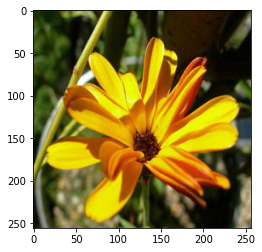

In [80]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread("flowers/calendula/1010982154_242fbe2cb0_c.jpg")
imgplot = plt.imshow(img)
plt.show()

In [120]:
IMG_SIZE = [128, 128, 3]
NUM_CLASSES = 16

In [121]:
# Load dataset
flowers_dataset = tf.keras.utils.image_dataset_from_directory(
    "flowers",
    labels=None,                          # No labels required for this
    image_size=[IMG_SIZE[0], IMG_SIZE[1]] # Resize the image
)

Found 15740 files belonging to 1 classes.


In [122]:
#model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
#model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
#model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [123]:
# Make generator network
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(8192, use_bias=False, input_shape=(NUM_CLASSES,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Reshape((4, 4, 512)))
    assert model.output_shape == (None, 4, 4, 512)

    model.add(layers.UpSampling2D((2, 2), interpolation="bilinear"))
    assert model.output_shape == (None, 8, 8, 512)
    model.add(layers.Conv2DTranspose(512, (3, 3), padding='same', use_bias=False))
    model.add(layers.LeakyReLU())
    model.add(layers.Conv2DTranspose(512, (3, 3), padding='same', use_bias=False))
    model.add(layers.LeakyReLU())
    model.add(layers.Conv2DTranspose(512, (3, 3), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    assert model.output_shape == (None, 8, 8, 512)

    model.add(layers.UpSampling2D((2, 2), interpolation="bilinear"))
    assert model.output_shape == (None, 16, 16, 512)
    model.add(layers.Conv2DTranspose(512, (3, 3), padding='same', use_bias=False))
    model.add(layers.LeakyReLU())
    model.add(layers.Conv2DTranspose(512, (3, 3), padding='same', use_bias=False))
    model.add(layers.LeakyReLU())
    model.add(layers.Conv2DTranspose(512, (3, 3), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    assert model.output_shape == (None, 16, 16, 512)

    model.add(layers.UpSampling2D((2, 2), interpolation="bilinear"))
    assert model.output_shape == (None, 32, 32, 512)
    model.add(layers.Conv2DTranspose(256, (3, 3), padding='same', use_bias=False))
    model.add(layers.LeakyReLU())
    model.add(layers.Conv2DTranspose(256, (3, 3), padding='same', use_bias=False))
    model.add(layers.LeakyReLU())
    model.add(layers.Conv2DTranspose(256, (3, 3), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    assert model.output_shape == (None, 32, 32, 256)

    model.add(layers.UpSampling2D((2, 2), interpolation="bilinear"))
    assert model.output_shape == (None, 64, 64, 256)
    model.add(layers.Conv2DTranspose(128, (3, 3), padding='same', use_bias=False))
    model.add(layers.LeakyReLU())
    model.add(layers.Conv2DTranspose(128, (3, 3), padding='same', use_bias=False))
    model.add(layers.LeakyReLU())
    model.add(layers.Conv2DTranspose(128, (3, 3), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    assert model.output_shape == (None, 64, 64, 128)

    model.add(layers.UpSampling2D((2, 2), interpolation="bilinear"))
    assert model.output_shape == (None, 128, 128, 128)
    model.add(layers.Conv2DTranspose(64, (3, 3), padding='same', use_bias=False))
    model.add(layers.LeakyReLU())
    model.add(layers.Conv2DTranspose(64, (3, 3), padding='same', use_bias=False))
    model.add(layers.LeakyReLU())
    model.add(layers.Conv2DTranspose(3, (3, 3), padding='same', use_bias=False))
    #model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    assert model.output_shape == (None, IMG_SIZE[0], IMG_SIZE[1], IMG_SIZE[2])

    return model

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


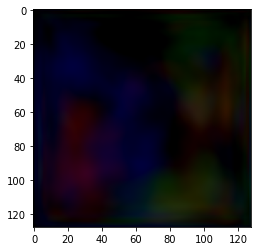

In [146]:
# Test (untrained) generator
generator = make_generator_model()

noise = tf.random.normal([1, NUM_CLASSES])
generated_image = generator(noise, training=False)

plt.imshow((generated_image[0] * 255))

In [125]:
generator.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 8192)              131072    
                                                                 
 batch_normalization_15 (Bat  (None, 8192)             32768     
 chNormalization)                                                
                                                                 
 leaky_re_lu_48 (LeakyReLU)  (None, 8192)              0         
                                                                 
 reshape_3 (Reshape)         (None, 4, 4, 512)         0         
                                                                 
 up_sampling2d_15 (UpSamplin  (None, 8, 8, 512)        0         
 g2D)                                                            
                                                                 
 conv2d_transpose_45 (Conv2D  (None, 8, 8, 512)       

In [126]:
# Make discriminator network
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, kernel_size=(3,3), padding="same", activation="relu", input_shape=IMG_SIZE))
    model.add(layers.Conv2D(64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(layers.Conv2D(128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(layers.Conv2D(128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(layers.Conv2D(256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(layers.Conv2D(256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(layers.Conv2D(256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(layers.Conv2D(512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(layers.Conv2D(512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(layers.Conv2D(512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(layers.Conv2D(512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(layers.Conv2D(512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(layers.Conv2D(512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128*3))
    model.add(layers.Dense(1))
    return model

In [127]:
# Test (untrained) discriminator
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[-1.1018803e-06]], shape=(1, 1), dtype=float32)


In [128]:
discriminator.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 128, 128, 64)      1792      
                                                                 
 conv2d_40 (Conv2D)          (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 64, 64, 128)       73856     
                                                                 
 conv2d_42 (Conv2D)          (None, 64, 64, 128)       147584    
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 32, 32, 128)      0         
 g2D)                                                 

In [129]:
# Loss function and optimizers
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [130]:
# Discriminator loss
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [131]:
# Generator loss
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [164]:
# Cycle loss
def cycle_loss(input, prediction):
    return tf.keras.losses.CosineSimilarity()(input, predictions)

In [133]:
# Load pre-trained flower classifier
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False,
                            input_shape=(128, 128,3))

# freeze extraction layers
base_model.trainable = False

# add custom top layers
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Flatten()(base_model.output)
predictions = layers.Dense(16, activation='sigmoid')(x)
clf = tf.keras.Model(inputs=base_model.input, outputs=predictions)
clf.load_weights("flower_model.h5")

In [134]:
# Separate optimizers, as they don't train simultaneously
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)
clf_optimizer = tf.keras.optimizers.Adam(1e-4)

In [135]:
# Training loop
EPOCHS = 10
noise_dim = NUM_CLASSES
num_examples_to_generate = 16

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [160]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape, tf.GradientTape() as clf_tape:
      generated_images = generator(noise, training=True)
      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)
      # Predict class of generated images
      pred_input = clf(generated_images)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)
      # Compute similarity of inputs with predicted class
      cyc_loss = cycle_loss(noise, pred_input)

    print("gen_loss = {}".format(gen_loss))
    print("cyc_loss = {}".format(cyc_loss))
    # TODO: Combine cyc_loss with gen_loss somehow
    gradients_of_generator = gen_tape.gradient(tf.math.add(gen_loss, cyc_loss), generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    #gradients_of_classifier = clf_tape.gradient(cyc_loss, clf.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    # clf_optimizer.apply_gradients(zip(gradients_of_classifier, clf.trainable_variables))

In [137]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()
    # print("Epoch {}".format(epoch))
    for image_batch in dataset:
      train_step(image_batch)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  generate_and_save_images(generator, epochs, seed)


In [138]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(16, 16))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i] * 255)
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()


In [163]:
# Train
train(flowers_dataset, EPOCHS)

gen_loss = Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
cyc_loss = KerasTensor(type_spec=TensorSpec(shape=(32,), dtype=tf.float32, name=None), name='tf.math.negative_12/Neg:0', description="created by layer 'tf.math.negative_12'")


AttributeError: ignored

In [ ]:
generate_and_save_images(generator, EPOCHS, seed)

In [ ]:
# Save generator
generator.save('iris_gan.h5')
# Load generator
generator_final = tf.keras.models.load_model('iris_gan.h5')